<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0606/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# tensorflow 2:
# a. keras已經是一份子
# b. gpu會直接辨別(cuda/cudnn還是要裝), 不需要安裝tensorflow-gpu
# c. eager mode(不用起tf.session就可以測試圖)
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


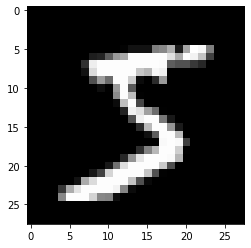

In [23]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 如果你要把色調反過來, _r
plt.imshow(x_train[0], cmap="gray")

In [24]:
# keras有兩種建立模型的方式
# a. Sequentital: 一層疊再一層的上面(限制比較大)
# b. Model: 每一層可以是任何形式去做(自由)
from tensorflow.keras.models import Sequential
# Dense(全連接層 Fully-Connected)
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 輸出一個神經元(二元分類): BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 輸出多個神經元: CategoricalCrossEntropy p1log(1/q1) + p2log(1/q2)......
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [26]:
# 針對y做處理: 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print("BEFORE:", y_train[0])
print("AFTER:", y_train_cat[0])

BEFORE: 5
AFTER: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [28]:
# 針對x做處理: 28 * 28 -> 784(numpy reshape)
# reshape(60000, 784) == reshape(-1, 784) == reshape(60000, -1)
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print("BEFORE:", x_train.shape)
print("AFTER:", x_train_norm.shape)

BEFORE: (60000, 28, 28)
AFTER: (60000, 784)
